
### Cet éxercice s'intéresse à l'identification de groupes cohérents au sein d'une population de souscripteurs d'assurance automobile dans plusieurs états des Etats Unis d'Amérique.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_24_WEEK_PROGRAM/master/S1.1%20--%20ML%20non-supervis%C3%A9%20-%20K-Means%20%26%20DBSCAN/S11-B%20-%20Pratique%20KMEANS%20%26%20DBSCAN/1.%20Pratique%20KMeans/Dataset/Auto_Insurance_Claims_Sample.csv?token=AGKBMYNOHDPYQWGYWOA3CJC7DWUYY")

In [3]:
dataset.shape

(9134, 26)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [5]:
dataset.head()
# variables quantitatives Claim Amount, Income, Monthly Premium Auto, Months Since Policy Inception, Number Of Open Complaints, Number Of Policies, Total Claim Amount
# categorical variables 'Customer', 'Country', 'StateCode', 'State', 'Response', 'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus', 'Gender', 'LocationCode', 'MaritalStatus', 'MonthlyPremiumAuto', 'PolicyType', 'Policy', 'ClaimReason', 'SalesChannel', 'VehicleClass', 'VehicleSize'
# les variables critiques pour le bon fonctionnement de la compagnie d'assurance sont Claim amount, total claim amount, et dans une moindre mesure Monthly Premium Auto

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [6]:
dataset_matrix = pd.get_dummies(dataset[[
                                        'Response', 'Coverage', 'Education', 'EmploymentStatus',
               'Gender', 'Income', 'Location Code', 'Marital Status', 'State',
               'Monthly Premium Auto', 'Months Since Last Claim',
               'Months Since Policy Inception', 'Number of Open Complaints',
               'Number of Policies', 'Policy Type', 'Policy',
               'Sales Channel', 'Vehicle Class', 'Vehicle Size'
]])

In [7]:
dataset["State"].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [8]:
dataset_matrix.groupby(dataset["State"]).mean()
# On observe pas de différence significatives entre les individus des différents états, on peut donc considérer de faire une étude commune à tous les états

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Iowa,37557.283353,93.763937,14.891196,48.237985,0.363706,2.973856,0.855440,0.144560,0.613610,0.295271,0.091119,0.298347,0.298347,0.041138,0.283353,0.078816,0.046136,0.623222,0.045367,0.029988,0.255286,0.512880,0.487120,0.197232,0.630527,0.172241,0.149558,0.580161,0.270281,1.0,0.0,0.0,0.0,0.0,0.207612,0.745098,0.047290,0.032680,0.061899,0.113033,0.138793,0.210304,0.396002,0.007689,0.021915,0.017686,0.379854,0.276432,0.191080,0.152634,0.495194,0.017686,0.023068,0.201077,0.051519,0.211457,0.101115,0.698577,0.200308
Kansas,38122.733083,92.031328,15.562657,49.229323,0.412281,2.928571,0.863409,0.136591,0.615288,0.294486,0.090226,0.278195,0.284461,0.037594,0.309524,0.090226,0.038847,0.630326,0.047619,0.030075,0.253133,0.516291,0.483709,0.189223,0.641604,0.169173,0.140351,0.561404,0.298246,0.0,1.0,0.0,0.0,0.0,0.201754,0.760652,0.037594,0.045113,0.052632,0.104010,0.140351,0.255639,0.364662,0.006266,0.017544,0.013784,0.394737,0.290727,0.184211,0.130326,0.520050,0.022556,0.013784,0.194236,0.032581,0.216792,0.105263,0.718045,0.176692
Missouri,37558.946667,93.495238,15.082540,47.648889,0.382540,2.967619,0.855238,0.144762,0.608254,0.302222,0.089524,0.308254,0.300952,0.031746,0.278413,0.080635,0.041587,0.621270,0.047937,0.033968,0.255238,0.502222,0.497778,0.191746,0.633968,0.174286,0.147619,0.580635,0.271746,0.0,0.0,1.0,0.0,0.0,0.234603,0.729524,0.035873,0.046984,0.071429,0.116190,0.124444,0.253333,0.351746,0.004127,0.014603,0.017143,0.381270,0.285714,0.192063,0.140952,0.505714,0.017460,0.020000,0.200952,0.056190,0.199683,0.103492,0.709206,0.187302
Nebraska,37405.402231,91.884909,15.097475,47.781562,0.383441,3.067528,0.857311,0.142689,0.614210,0.301233,0.084557,0.303582,0.287140,0.044040,0.289489,0.075749,0.049325,0.623018,0.046976,0.028186,0.252496,0.513799,0.486201,0.190840,0.634175,0.174985,0.156782,0.596594,0.246624,0.0,0.0,0.0,1.0,0.0,0.195537,0.759248,0.045214,0.034058,0.062243,0.099237,0.149736,0.225484,0.384028,0.013506,0.017029,0.014680,0.377569,0.275396,0.207281,0.139753,0.525543,0.016442,0.018203,0.185555,0.054022,0.200235,0.103934,0.711098,0.184968
Oklahoma,38369.605442,94.278912,15.333333,48.530612,0.428571,2.776644,0.859410,0.140590,0.588435,0.310658,0.100907,0.297052,0.273243,0.034014,0.303855,0.091837,0.044218,0.630385,0.051020,0.028345,0.246032,0.515873,0.484127,0.204082,0.623583,0.172336,0.154195,0.562358,0.283447,0.0,0.0,0.0,0.0,1.0,0.221088,0.739229,0.039683,0.036281,0.069161,0.115646,0.136054,0.214286,0.388889,0.005669,0.020408,0.013605,0.374150,0.280045,0.184807,0.160998,0.487528,0.018141,0.021542,0.191610,0.062358,0.218821,0.108844,0.667800,0.223356


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as sc

dataset_matrix_num_scaled = sc().fit_transform(
    dataset[[
      'Income',
      'Monthly Premium Auto', 'Months Since Last Claim',
      'Months Since Policy Inception', 'Number of Open Complaints',
      'Number of Policies'
    ]])
dataset_matrix_num_scaled = pd.DataFrame(
    dataset_matrix_num_scaled,
    columns=[
      'Income',
      'Monthly Premium Auto', 'Months Since Last Claim',
      'Months Since Policy Inception', 'Number of Open Complaints',
      'Number of Policies'
    ]
)

dataset_matrix_cat = pd.get_dummies(
    dataset[[
      'Response',
      'Coverage', 'Education', 'EmploymentStatus',
      'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
      'Sales Channel', 'Vehicle Class', 'Vehicle Size'
   ]])

In [10]:
dataset_matrix_scaled = pd.concat([dataset_matrix_num_scaled, dataset_matrix_cat], axis=1)

In [11]:
kmeans = KMeans(n_clusters=2)
customer_kmean_cluster_2 = kmeans.fit_predict(dataset_matrix_scaled)
dataset_matrix.groupby(customer_kmean_cluster_2).mean()

# un des clusters contient la quasi totalité des employed, et l'autre contient l'intégralité des autres catégories d'employement status

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,7518.652570,93.786070,15.200387,48.216142,0.371200,2.979547,0.830846,0.169154,0.601437,0.312880,0.085683,0.300995,0.294638,0.028469,0.320343,0.055556,0.108900,0.054174,0.118574,0.077944,0.640409,0.498618,0.501382,0.046711,0.908513,0.044776,0.147872,0.396904,0.455224,0.284964,0.086512,0.347982,0.185738,0.094804,0.213101,0.747098,0.039801,0.040907,0.064124,0.108071,0.136263,0.239359,0.371476,0.007186,0.017689,0.014925,0.394693,0.276396,0.178552,0.150359,0.494472,0.015202,0.021559,0.209232,0.061360,0.198176,0.111940,0.691819,0.196241
1,57425.675127,92.847534,15.029188,47.965192,0.393038,2.957397,0.873822,0.126178,0.614938,0.291878,0.093183,0.300761,0.292785,0.043328,0.265228,0.097897,0.001994,0.997462,0.000544,0.000000,0.000000,0.517404,0.482596,0.290790,0.451777,0.257433,0.151197,0.700145,0.148658,0.284627,0.087926,0.342821,0.186911,0.097716,0.217005,0.740573,0.042422,0.038252,0.065809,0.112944,0.135424,0.227701,0.377447,0.007252,0.018129,0.017041,0.371465,0.284083,0.202864,0.141588,0.513416,0.019579,0.019217,0.188361,0.047498,0.211929,0.098078,0.710841,0.191080


In [13]:
employees = dataset_matrix_scaled.loc[dataset_matrix_scaled["EmploymentStatus_Employed"]==1,
                                      ]

In [17]:
# Ns = range(1, 10)
# kmeans = [KMeans(n_clusters=i) for i in Ns]
# scores = [kmean.fit(employees).inertia_ for kmean in kmeans]

Ns = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Ns]
scores = [kmean.fit(employees).inertia_ for kmean in kmeans]

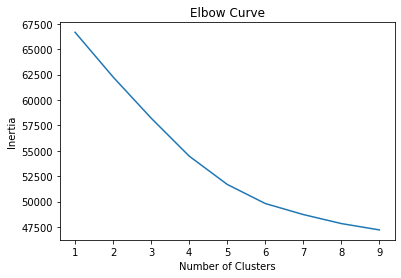

In [19]:
plt.plot(Ns, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# nous retenons 6 clusters pour la sous population des employed

 ### Afin de pouvoir visualiser et analyser les différentes classes, nous procéderons à une PCA à 3 composantes. On analysera ces composantes afin de pouvoir les interpréter en termes des variables d'origine. Puis on visualisera les différentes classes selon les axes définis par les composantes principales afin de décrire les clusters.

In [23]:
kmeans6 = KMeans(n_clusters=6)
employee_kmean6 = kmeans6.fit_transform(employees)

from sklearn.decomposition import PCA 
pca3 = PCA(n_components=3)
employee_reduced = pca3.fit_transform(employees)

pca3.explained_variance_ratio_

# les 3 premières variables ne sont pas ultra explicatives (env. 30% de l'inertie seulement)

array([0.10390661, 0.0908789 , 0.0861083 ])